In [1]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
filename = "/content/pg236.txt"
raw_text = open(filename,'r',encoding='utf-8').read()
print(raw_text[:1000])

The Project Gutenberg eBook of The Jungle Book
This ebook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before using this eBook.
Song in the JungleIt was seven o’clock of a very warm evening in the Seeonee hills when Father Wolf woke up from his day’s rest, scratched himself, yawned, and spread out his paws one after the other to get rid of the sleepy feeling in their tips. Mother Wolf lay with her big gray nose dropped across her four tumbling, squealing cubs, and the moon shone into the mouth of the cave where they all lived. “Augrh!” said Father Wolf. “It is time to hunt again.” He was going to spring down hill when a little sha

In [3]:
raw_text = ' '.join(c for c in raw_text if not c.isdigit())
chars = sorted(list(set(raw_text)))
print(chars)

['\n', ' ', '!', '$', '%', '(', ')', '*', ',', '-', '.', '/', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '}', 'â', '—', '‘', '’', '“', '”', '•', '™']


In [4]:
char_to_int = dict((c,i) for i,c in enumerate(chars))
int_to_char = dict((i,c) for i,c in enumerate(chars))

In [5]:
n_chars = len(raw_text)
v_vocab = len(chars)
print("Total Characters: ",n_chars)
print("Total Vocab: ",v_vocab)

Total Characters:  583269
Total Vocab:  80


In [6]:
seq_length = 80
step = 8
sentences = []
next_char = []
for i in range(0, len(raw_text) - seq_length, step):
    sentences.append(raw_text[i: i + seq_length])
    next_char.append(raw_text[i + seq_length])
n_pattens = len(sentences)
print("Total Patterns: ", n_pattens)

Total Patterns:  72899


In [7]:
sentences[0:5]

['T h e   P r o j e c t   G u t e n b e r g   e B o o k   o f   T h e   J u n g l ',
 'P r o j e c t   G u t e n b e r g   e B o o k   o f   T h e   J u n g l e   B o ',
 'e c t   G u t e n b e r g   e B o o k   o f   T h e   J u n g l e   B o o k \n T ',
 'G u t e n b e r g   e B o o k   o f   T h e   J u n g l e   B o o k \n T h i s   ',
 'n b e r g   e B o o k   o f   T h e   J u n g l e   B o o k \n T h i s   e b o o ']

In [8]:
x = np.zeros((len(sentences),seq_length,v_vocab),dtype=bool)
y = np.zeros((len(sentences),v_vocab),dtype=bool)
for i,sentence in enumerate(sentences):
    for t,char in enumerate(sentence):
        x[i,t,char_to_int[char]] = 1
    y[i,char_to_int[next_char[i]]] = 1
# summarize the loaded data
print(x.shape)
print(y.shape)
print(y[0:5])

(72899, 80, 80)
(72899, 80)
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
   True False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False  True False
  False False False False False False False False False False False False
  False False False False False F

In [9]:
model = Sequential()
model.add(LSTM(128,input_shape=(seq_length,v_vocab)))
model.add(Dense(v_vocab,activation='softmax'))
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               107008    
                                                                 
 dense (Dense)               (None, 80)                10320     
                                                                 
Total params: 117328 (458.31 KB)
Trainable params: 117328 (458.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
from keras.callbacks import ModelCheckpoint
filepath = "weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')
callbacks_list = [checkpoint]

In [13]:
history = model.fit(x,y,batch_size=128,epochs=50,callbacks = callbacks_list)

Epoch 1/50
567/570 [============================>.] - ETA: 0s - loss: 1.3574
Epoch 1: loss improved from 1.37823 to 1.35769, saving model to weights-improvement-01-1.3577.hdf5
570/570 [==============================] - 4s 7ms/step - loss: 1.3577
Epoch 2/50
567/570 [============================>.] - ETA: 0s - loss: 1.3442
Epoch 2: loss improved from 1.35769 to 1.34400, saving model to weights-improvement-02-1.3440.hdf5
570/570 [==============================] - 4s 7ms/step - loss: 1.3440
Epoch 3/50
568/570 [============================>.] - ETA: 0s - loss: 1.3272
Epoch 3: loss improved from 1.34400 to 1.32763, saving model to weights-improvement-03-1.3276.hdf5
570/570 [==============================] - 4s 7ms/step - loss: 1.3276
Epoch 4/50
568/570 [============================>.] - ETA: 0s - loss: 1.3159
Epoch 4: loss improved from 1.32763 to 1.31598, saving model to weights-improvement-04-1.3160.hdf5
570/570 [==============================] - 4s 7ms/step - loss: 1.3160
Epoch 5/50
570/5

In [14]:
model.save_weights("model.h5")

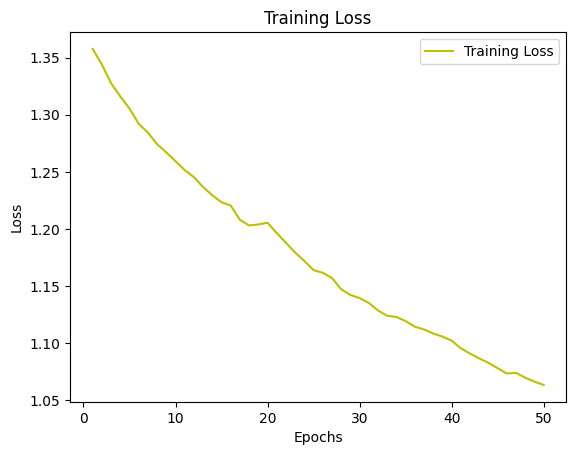

In [15]:
loss = history.history['loss']
epochs = range(1,len(loss) +1)
plt.plot(epochs,loss,'y',label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
def sample(preds):
  preds = np.array(preds).astype('float64')
  preds = np.log(preds)
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1,preds,1)
  return np.argmax(probas)

In [17]:
filename = "/content/model.h5"
model.load_weights(filename)
start_index = np.random.randint(0,len(raw_text) - seq_length -1)
generated = ''
sentence = raw_text[start_index:start_index + seq_length]
generated += sentence
print('Generating with seed: "' + sentence + '"')
sys.stdout.write(generated)

Generating with seed: "m ,   a n d   c o n t i n u e   h i s   s o n g   a b o u t   t h e   d e a t h "
m ,   a n d   c o n t i n u e   h i s   s o n g   a b o u t   t h e   d e a t h 

In [18]:
for i in range(400):
  x_pred = np.zeros((1,seq_length,v_vocab))
  for t,char in enumerate(sentence):
    x_pred[0,t,char_to_int[char]] = 1
  preds = model.predict(x_pred,verbose=0)[0]
  next_index = sample(preds)
  next_char = int_to_char[next_index]
  generated += next_char
  sentence = sentence[1:] + next_char
  sys.stdout.write(next_char)
  sys.stdout.flush()
print()

.bbySl,aWryTsmbbdbbSbulbwbaivdaI’vSe.ngbblbomB bybukkkpnbbbkbuAbppIeB!kIakIkI’vvleb!dI- hkbiem“ppefbwblIeTsTybevbybyb’voeMonbyb oLuReetmIvvbevkhbyhhbfafokybbouub“wybbie“”PdbblyfgLrTafkySsbperTabvkaeaI  pperoupStukIevbibueabnbuandvluaI!n  aSnbahIahBuondI’vIlIeI hmaTseTdbbubtwfbbrBTvboaaeT-au“cIeIvytm“okI ftfwhfiwbyPe“ouKKhwair“dI dvbyf!bvbiIeM bdorvbiIevvkiibbbeendbulIaftvlibvbakbtkbbyM iabtBiybbu“
